In [1]:
import numpy as np
import pandas as pd
import numpy.random as npr

In [2]:
cd E:/Project CPC152

E:\Project CPC152


In [3]:
iris = pd.read_csv("iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Understanding the data

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris.shape

(150, 6)

In [7]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Cleaning Data

In [8]:
iris.apply(lambda x: sum(x.isnull()), axis = 0)

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Spliting the Dataset

In [9]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(iris,test_size=0.3,random_state=4)
train_set1,test_set1 = train_test_split(iris,test_size=0.2,random_state=4)

In [10]:
print(train_set.shape)
print(test_set.shape)

(105, 6)
(45, 6)


In [11]:
print(train_set1.shape)
print(test_set1.shape)

(120, 6)
(30, 6)


In [12]:
train_set.to_csv("train_set.csv")
test_set.to_csv("test_set.csv")
train_set1.to_csv("train_set1.csv")
test_set1.to_csv("test_set1.csv")

## Change the data type from string to numeric using Encoder

In [13]:
pd.options.mode.chained_assignment = None

In [14]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Species']
le = LabelEncoder()
for i in var_mod:
    train_set[i] = le.fit_transform(train_set[i])
train_set.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Species']
le = LabelEncoder()
for i in var_mod:
    test_set[i] = le.fit_transform(test_set[i])
test_set.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Species']
le = LabelEncoder()
for i in var_mod:
    train_set1[i] = le.fit_transform(train_set1[i])
train_set1.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Species']
le = LabelEncoder()
for i in var_mod:
    test_set1[i] = le.fit_transform(test_set1[i])
test_set1.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

## Feature Importance

In [18]:
data = pd.read_csv('train_set.csv')

In [19]:
x = data.iloc[:, 2:6]
y = data.iloc[:, -1]

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.10373649 0.066473   0.42038907 0.40940144]


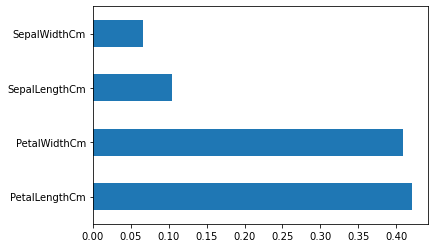

In [21]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

In [23]:
data = train_set1
x = data.iloc[:,1:6]

In [24]:
x.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

In [25]:
corrmat = x.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

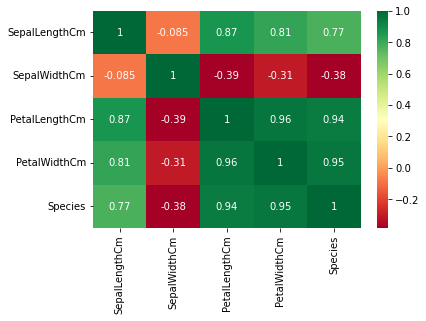

In [26]:
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

## Predictions

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [28]:
model = DecisionTreeClassifier() 

### For 70% train_set and 30% test_set

### Using SepalLengthCm and SepalWidthCm to predict the species of iris

In [29]:
model.fit(train_set[['SepalLengthCm','SepalWidthCm']], train_set['Species'])

DecisionTreeClassifier()

In [30]:
predictions = model.predict(test_set[['SepalLengthCm','SepalWidthCm']])
predictions

array([2, 0, 2, 2, 2, 1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       2])

In [31]:
test_set = test_set.assign(Predictions = predictions)
test_set

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predictions
128,129,6.4,2.8,5.6,2.1,2,2
18,19,5.7,3.8,1.7,0.3,0,0
130,131,7.4,2.8,6.1,1.9,2,2
105,106,7.6,3.0,6.6,2.1,2,2
107,108,7.3,2.9,6.3,1.8,2,2
78,79,6.0,2.9,4.5,1.5,1,1
83,84,6.0,2.7,5.1,1.6,1,1
14,15,5.8,4.0,1.2,0.2,0,1
5,6,5.4,3.9,1.7,0.4,0,0
133,134,6.3,2.8,5.1,1.5,2,2


In [32]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(test_set['Species'], predictions))
print('Recall: ', recall_score(test_set['Species'], predictions, average="weighted"))
print('Precision: ', precision_score(test_set['Species'], predictions, average="weighted"))
confusion = confusion_matrix(test_set['Species'], predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy:  0.8
Recall:  0.8
Precision:  0.808989898989899
Confusion matrix: 
[[19  2  0]
 [ 1  6  3]
 [ 0  3 11]]


### Using SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm to predict the species of iris

In [33]:
model.fit(train_set[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], train_set['Species'])

DecisionTreeClassifier()

In [34]:
predictions = model.predict(test_set[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
predictions

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0,
       2])

In [35]:
test_set = test_set.assign(Predictions = predictions)
test_set

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predictions
128,129,6.4,2.8,5.6,2.1,2,2
18,19,5.7,3.8,1.7,0.3,0,0
130,131,7.4,2.8,6.1,1.9,2,2
105,106,7.6,3.0,6.6,2.1,2,2
107,108,7.3,2.9,6.3,1.8,2,2
78,79,6.0,2.9,4.5,1.5,1,1
83,84,6.0,2.7,5.1,1.6,1,2
14,15,5.8,4.0,1.2,0.2,0,0
5,6,5.4,3.9,1.7,0.4,0,0
133,134,6.3,2.8,5.1,1.5,2,2


In [36]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(test_set['Species'], predictions))
print('Recall: ', recall_score(test_set['Species'], predictions, average="weighted"))
print('Precision: ', precision_score(test_set['Species'], predictions, average="weighted"))
confusion = confusion_matrix(test_set['Species'], predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy:  0.9777777777777777
Recall:  0.9777777777777777
Precision:  0.9792592592592592
Confusion matrix: 
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]


### For 80% train_set and 20% test_set

### Using SepalLengthCm and SepallWidthCm to predict the species of iris

In [37]:
model.fit(train_set1[['SepalLengthCm','SepalWidthCm']], train_set1['Species'])

DecisionTreeClassifier()

In [38]:
predictions = model.predict(test_set1[['SepalLengthCm','SepalWidthCm']])
predictions

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 1, 0, 0, 1])

In [39]:
test_set1 = test_set1.assign(Predictions = predictions)
test_set1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predictions
128,129,6.4,2.8,5.6,2.1,2,2
18,19,5.7,3.8,1.7,0.3,0,0
130,131,7.4,2.8,6.1,1.9,2,2
105,106,7.6,3.0,6.6,2.1,2,2
107,108,7.3,2.9,6.3,1.8,2,2
78,79,6.0,2.9,4.5,1.5,1,1
83,84,6.0,2.7,5.1,1.6,1,2
14,15,5.8,4.0,1.2,0.2,0,0
5,6,5.4,3.9,1.7,0.4,0,0
133,134,6.3,2.8,5.1,1.5,2,2


In [40]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(test_set1['Species'], predictions))
print('Recall: ', recall_score(test_set1['Species'], predictions, average="weighted"))
print('Precision: ', precision_score(test_set1['Species'], predictions, average="weighted"))
confusion = confusion_matrix(test_set1['Species'], predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy:  0.8666666666666667
Recall:  0.8666666666666667
Precision:  0.8910714285714286
Confusion matrix: 
[[15  1  0]
 [ 0  4  1]
 [ 0  2  7]]


### Using SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm to predict the species of iris

In [41]:
model.fit(train_set1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], train_set1['Species'])

DecisionTreeClassifier()

In [42]:
predictions = model.predict(test_set1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
predictions

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2])

In [43]:
test_set1 = test_set1.assign(Predictions = predictions)
test_set1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predictions
128,129,6.4,2.8,5.6,2.1,2,2
18,19,5.7,3.8,1.7,0.3,0,0
130,131,7.4,2.8,6.1,1.9,2,2
105,106,7.6,3.0,6.6,2.1,2,2
107,108,7.3,2.9,6.3,1.8,2,2
78,79,6.0,2.9,4.5,1.5,1,1
83,84,6.0,2.7,5.1,1.6,1,2
14,15,5.8,4.0,1.2,0.2,0,0
5,6,5.4,3.9,1.7,0.4,0,0
133,134,6.3,2.8,5.1,1.5,2,2


In [44]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(test_set1['Species'], predictions))
print('Recall: ', recall_score(test_set1['Species'], predictions, average="weighted"))
print('Precision: ', precision_score(test_set1['Species'], predictions, average="weighted"))
confusion = confusion_matrix(test_set1['Species'], predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy:  0.9666666666666667
Recall:  0.9666666666666667
Precision:  0.9700000000000001
Confusion matrix: 
[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]
